# EDA

In [34]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error



# Stocks and Commodities

#### This section explores `all_commodities.csv` and `all_stock_and_etfs.csv`

In [11]:
stock_n_etfs_df = pd.read_csv('Datathon_Data/all_stock_and_etfs.csv')

#### First we process the dataset `all_commodities.csv`, note that there is a missing value in the categories of commodities.

In [31]:
commodities_df = pd.read_csv('Datathon_Data/all_commodities.csv', parse_dates=['Date-Time'], index_col='Date-Time')
commodities_df.head()
unique_commodities = commodities_df['Commodity'].unique()
df_copy = commodities_df.copy()
unique_commodities

array(['Coffee', 'Corn', nan, 'Sugar'], dtype=object)

#### For now we fill the missing value with a placeholder "Unknown"

In [32]:
df_copy['Commodity'] = df_copy['Commodity'].fillna('Unknown')
unique_commodities = df_copy['Commodity'].unique()
unique_commodities

array(['Coffee', 'Corn', 'Unknown', 'Sugar'], dtype=object)

The following is time series visualization for the four different categories in the commodities. You might be wondering where is the "Corn", actually there is only one row for this category in the original dataframe, so it's not visible.

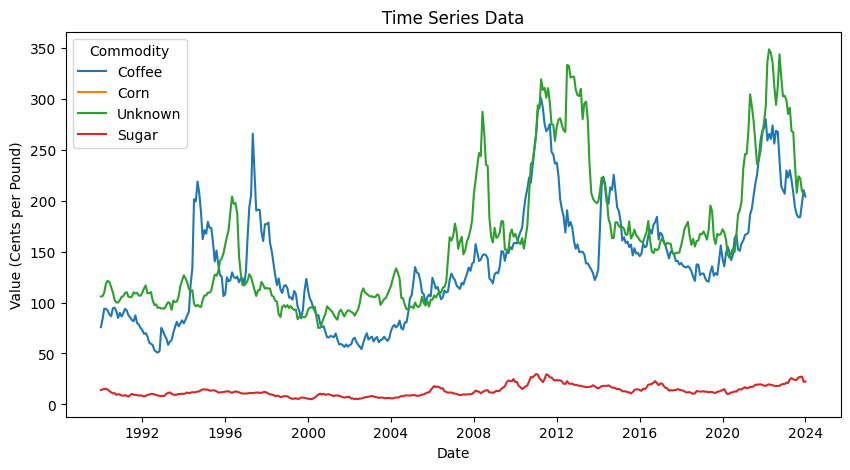

In [33]:
plt.figure(figsize=(10, 5))
for commodity in df_copy['Commodity'].unique():
    subset = df_copy[df_copy['Commodity'] == commodity]
    plt.plot(subset.index, subset['Value'], label=commodity)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value (Cents per Pound)')
plt.legend(title='Commodity')
plt.show()